In [5]:
import pandas as pd
import numpy as np
import math

# Create the DataFrame
df = pd.DataFrame({
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'medium', 'medium', 'low', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes']
})

def entropy(dt):
    value_counts = dt.value_counts()
    total_samples = len(dt)
    entropy_value = 0

    for count in value_counts:
        probability = count / total_samples
        entropy_value -= probability * math.log2(probability)

    return entropy_value

def information_gain(target_entropy, data, feature):
    weighted_entropy = 0
    unique_values = data[feature].unique()
    
    for value in unique_values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset['buys_computer'])
        weight = len(subset) / len(data)
        weighted_entropy += weight * subset_entropy
        
    info_gain = target_entropy - weighted_entropy
    return info_gain

def root_node(data):
    target_entropy = entropy(data['buys_computer'])
    features = ['age', 'income', 'student', 'credit_rating']
    max_information_gain = -1
    root_node_feature = None

    for feature in features:
        info_gain = information_gain(target_entropy, data, feature)
        if info_gain > max_information_gain:
            max_information_gain = info_gain
            root_node_feature = feature

    return root_node_feature

print(entropy(df['buys_computer']))
print(root_node(df))


0.9709505944546686
age


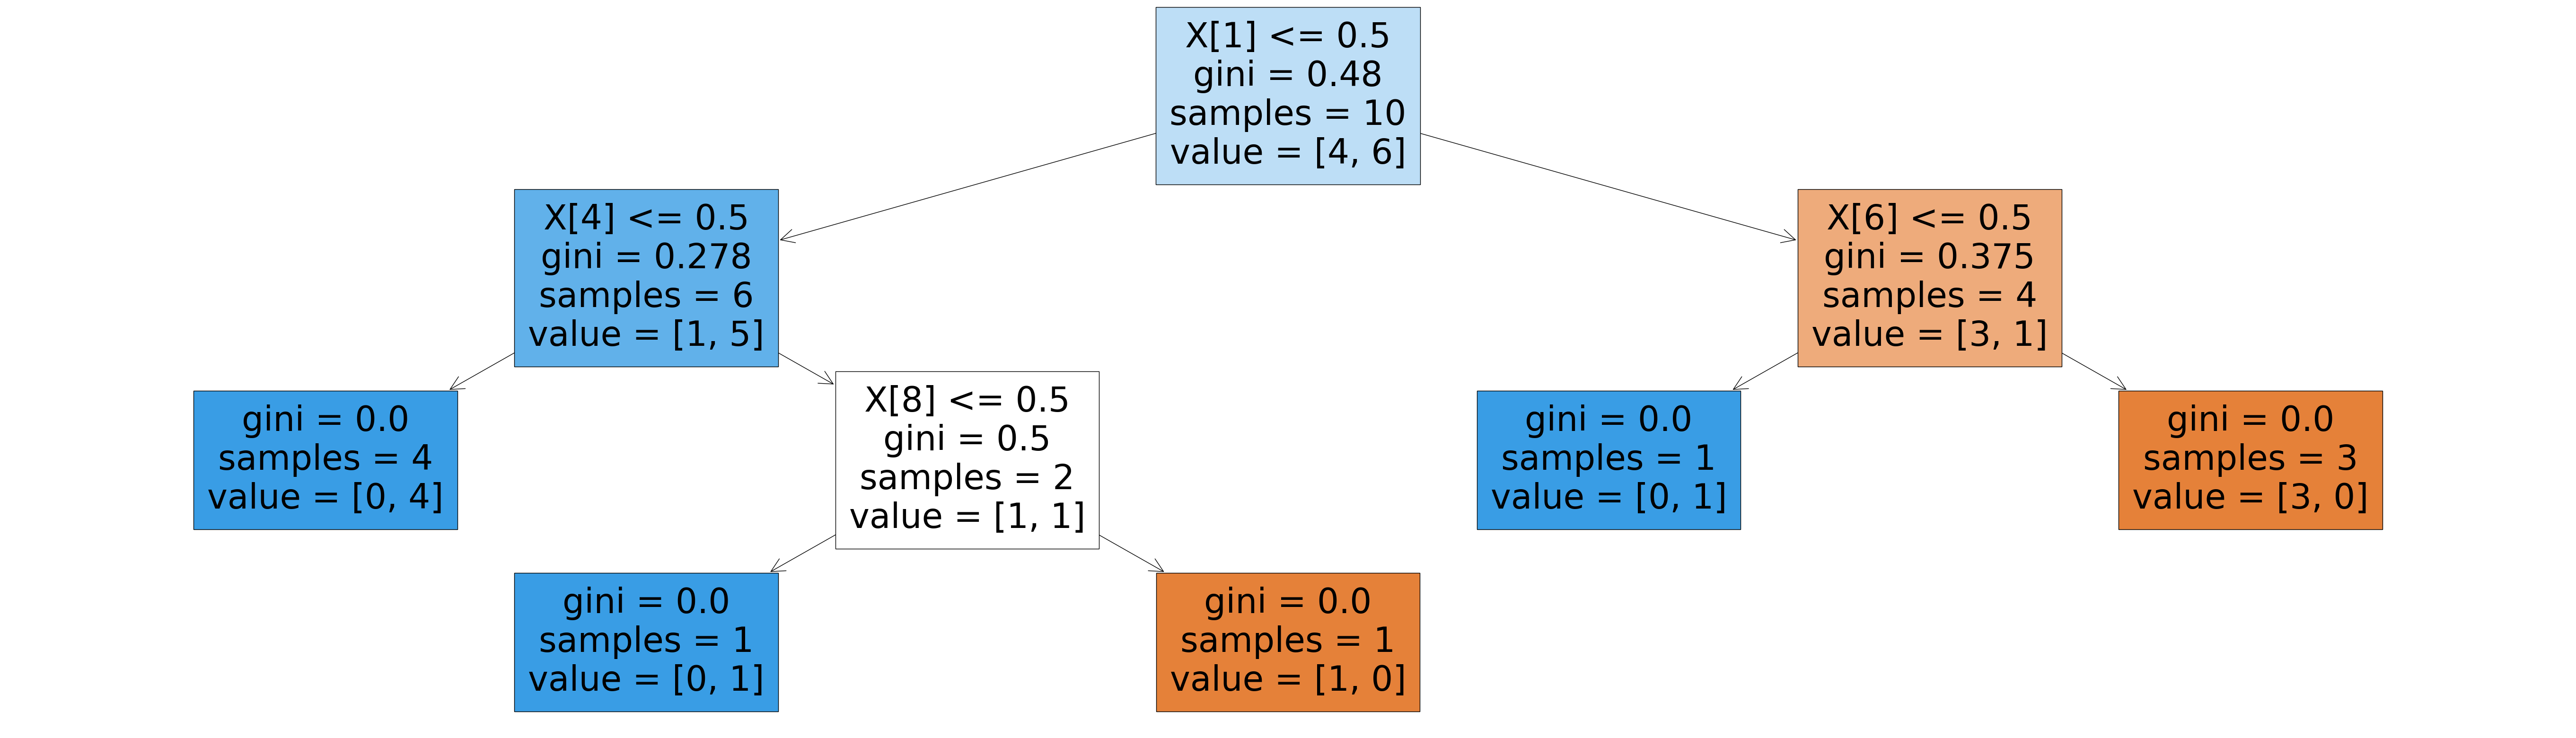

In [7]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def create_decision_tree(data, class_col):
    # Create a Decision Tree with one-hot encoding
    data_encoded = pd.get_dummies(data, columns=[col for col in data.columns if col != class_col])
    clf = DecisionTreeClassifier()
    X = data_encoded.drop(columns=[class_col])
    y = data_encoded[class_col]
    
    clf.fit(X, y)
    clf.score(X,y)
    return clf

def visualize_decision_tree(tree_model, feature_names, class_names):
    # Visualize the Decision Tree
    plt.figure(figsize=(70, 20))
    plot_tree(tree_model, filled=True)
    plt.show()


tree_model = create_decision_tree(df, 'buys_computer')

feature_names = list(df.columns)
feature_names.remove('buys_computer') 

class_names = ['buys_computer']  

visualize_decision_tree(tree_model, feature_names, class_names)


In [8]:
dt=pd.read_csv('extracted_features_charrec.csv')
entropy(dt)

12.174068211955056

NameError: name 'entropy_of_series' is not defined